In [45]:
%pip install pandas
%pip install openpyxl
%pip install matplotlib
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
                                              0.0/293.3 kB ? eta -:--:--
     --------                                61.4/293.3 kB 1.6 MB/s eta 0:00:01
     ---------------                        122.9/293.3 kB 1.4 MB/s eta 0:00:01
     -------------------------              194.6/293.3 kB 1.7 MB/s eta 0:00:01
     -----------------------------------    276.5/293.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [32]:

import pandas as pd

data1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
data2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')
data = pd.concat([data1, data2])


In [33]:
data.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [34]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1067371 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 73.3+ MB


In [35]:
data.describe()


,Quantity,InvoiceDate,Price,Customer ID
count,1.067371e+06,1067371,1.067371e+06,824364.000000
mean,9.938898e+00,2011-01-02 21:13:55.394028544,4.649388e+00,15324.638504
min,-8.099500e+04,2009-12-01 07:45:00,-5.359436e+04,12346.000000
25%,1.000000e+00,2010-07-09 09:46:00,1.250000e+00,13975.000000
50%,3.000000e+00,2010-12-07 15:28:00,2.100000e+00,15255.000000
75%,1.000000e+01,2011-07-22 10:23:00,4.150000e+00,16797.000000
max,8.099500e+04,2011-12-09 12:50:00,3.897000e+04,18287.000000
std,1.727058e+02,NaN,1.235531e+02,1697.464450


In [36]:
# Chequear formato de fecha y hora
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Formar columnas de mes y año
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year


### País que más productos consume

In [37]:
# Consumos por países 
country_consumption = data.groupby('Country')['Quantity'].sum()
# País que más consume
max_consumption_country = country_consumption.idxmax()
print(f"El país que más productos consume es: {max_consumption_country}")
print(country_consumption)


El país que más productos consume es: United Kingdom
Country
Australia                103706
Austria                   11306
Bahrain                    1275
Belgium                   35132
Bermuda                    2798
Brazil                      545
Canada                     3657
Channel Islands           20473
Cyprus                    10688
Czech Republic              592
Denmark                  235218
EIRE                     331341
European Community          497
Finland                   14317
France                   184952
Germany                  224581
Greece                     7707
Hong Kong                  7075
Iceland                    3286
Israel                     5485
Italy                     15309
Japan                     31822
Korea                       598
Lebanon                     457
Lithuania                  2958
Malta                      2491
Netherlands              381951
Nigeria                      56
Norway                    27110
Poland     

### Top de ventas totales por producto

In [53]:
n = 5
# Ventas totales por producto
product_sales = data.groupby('StockCode')['Quantity'].sum()
# Top de n productos con más ventas
top_selling_products = product_sales.nlargest(n)
print("Productos más vendidos:")
print(top_selling_products)

print("********************************")

# Ganancias totales por producto
print("Productos con más ganancias:")
data['TotalRevenue'] = data['Price'] * data['Quantity']
product_revenue = data.groupby('StockCode')['TotalRevenue'].sum()
# Top de n productos que dejaron más ganancias
top_profitable_products = product_revenue.nlargest(n)

print(top_profitable_products)

Productos más vendidos:
StockCode
84077     108545
85123A     96066
85099B     95739
21212      95450
84879      80705
Name: Quantity, dtype: int64
********************************
Productos con más ganancias:
StockCode
22423     327813.65
DOT       322647.47
85123A    253720.02
85099B    181278.51
47566     147948.50
Name: TotalRevenue, dtype: float64


### Ventas por mes del año

In [40]:
monthly_sales = data.groupby(['Year', 'Month'])['Quantity'].sum()
print(monthly_sales)

Year  Month
2009  12       420088
2010  1        375363
      2        368402
      3        489370
      4        351971
      5        364095
      6        388253
      7        302201
      8        451803
      9        478262
      10       601729
      11       673856
      12       508876
2011  1        308966
      2        277989
      3        351872
      4        289098
      5        380391
      6        341623
      7        391116
      8        406199
      9        549817
      10       570532
      11       740286
      12       226334
Name: Quantity, dtype: int64


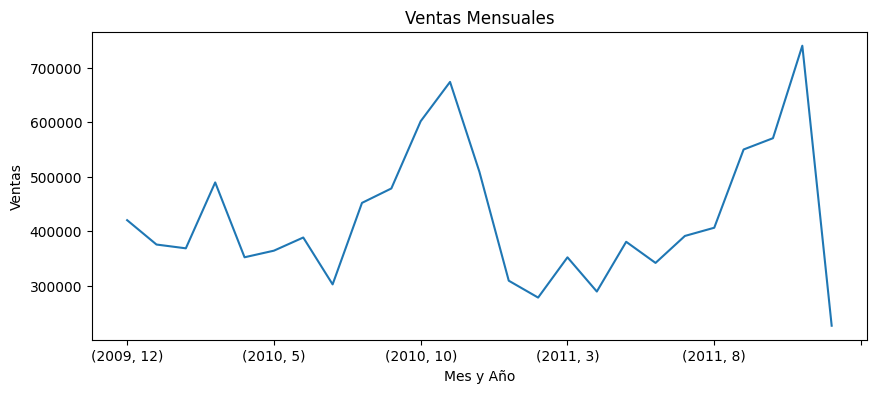

In [49]:
# Gráficas
import matplotlib.pyplot as plt

# Graficar las ventas mensuales
monthly_sales.plot(kind='line', figsize=(10, 4))
plt.xlabel('Mes y Año')
plt.ylabel('Ventas')
plt.title('Ventas Mensuales')
plt.show()


#### Análisis de gráfica
Se evidencia picos considerables de ventas en noviembre tanto de 2010 como de 2011. También hay un pequeño pico en las ventas de marzo de 2010, el cual disminuyó para el mismo mes de año 2011. En julio de 2010 las ventas tuvieron su valor mínimo del año, y en febrero y abril las ventas tuvieron los valores más bajos durante el 2011. En 2009, 2010 y 2011 se observa una caída pronunciada en diciembre, que tanto en 2010 como en 2011 se mantiene durante los meses de enero y febrero.

### Análisis de correlación entre variables


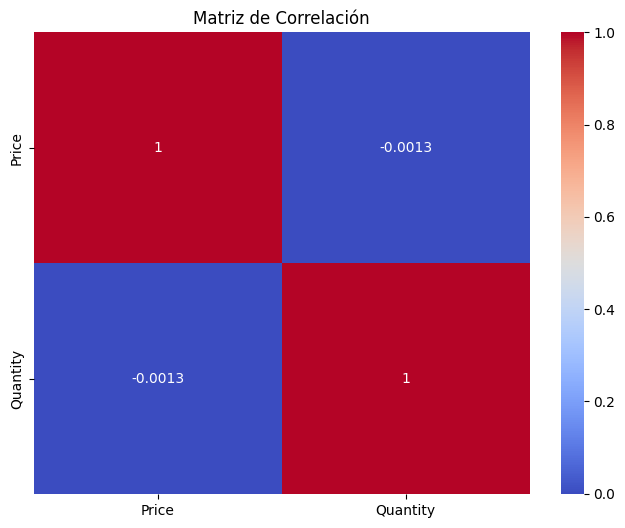

Coeficiente de correlación entre Precio y Cantidad: -0.0013187514887231867


In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

interesting_variables = data[['Price', 'Quantity']]

correlation_matrix = interesting_variables.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Coeficiente de correlación entre Precio y Cantidad
correlation_coefficient = correlation_matrix.loc['Price', 'Quantity']
print(f"Coeficiente de correlación entre Precio y Cantidad: {correlation_coefficient}")


#### Análisis de correlación
La correlación entre el precio y la cantidad, con un coeficiente de relación de -0.0013 es prácticamente nula. No hay relación lineal considerable entre las variables.